# Data Preperation
In this stage we will investigate the quality of the data, handle missing data and determine if there are any outliers.

In [524]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', None)

In [525]:
# Loading house price train dataset
df_train = pd.read_csv(r'../data/raw_data/train.csv')
df_test = pd.read_csv(r'../data/raw_data/test.csv')
print(df_train.shape)
print(df_test.shape)
train_len = len(df_train)-1
df = pd.concat([df_train, df_test], ignore_index=True)
print(df.shape)
df.head()

(1460, 81)
(1459, 80)
(2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [526]:
# Dropping the Id column as this is not a feature
df.drop(columns='Id', inplace=True)

In [527]:
# Identifying the datatypes in the dataset
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

## Missing Data
We will next investigate whether there is any missing data in the datasets.

In [528]:
# Checking for null values
missing_data = df.isna().sum()
missing_data[missing_data>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

It is evident that there are many features in the dataset that are missing data. SalePrice can be ignored as it is not included in the test dataset as this is what we will be predicing. We will now investigate each of these features individually and decide what to do with the missing data/feature. It should be noted at this point that imputed values should be informed/calculated from the training data to avoid data leakage.

### MSZoning
Categorical. 4 missing.

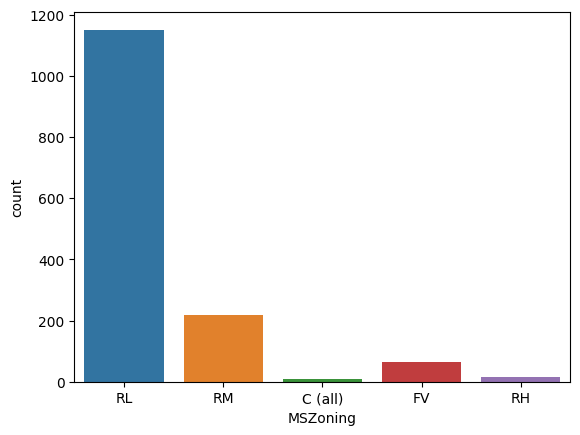

In [529]:
# Visualising the distribution of values
sns.countplot(df_train, x='MSZoning');

In [530]:
# Imputing with the mode
df['MSZoning'].fillna('RL', inplace=True)

### Lot Frontage
Numerical. 468 missing.

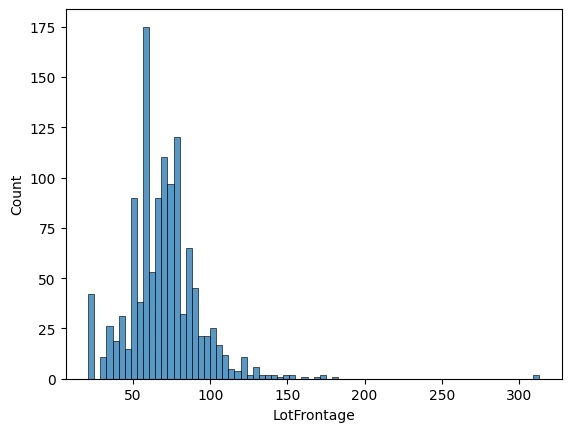

In [531]:
# Looking at the distribution of the feature values
sns.histplot(df_train, x='LotFrontage');

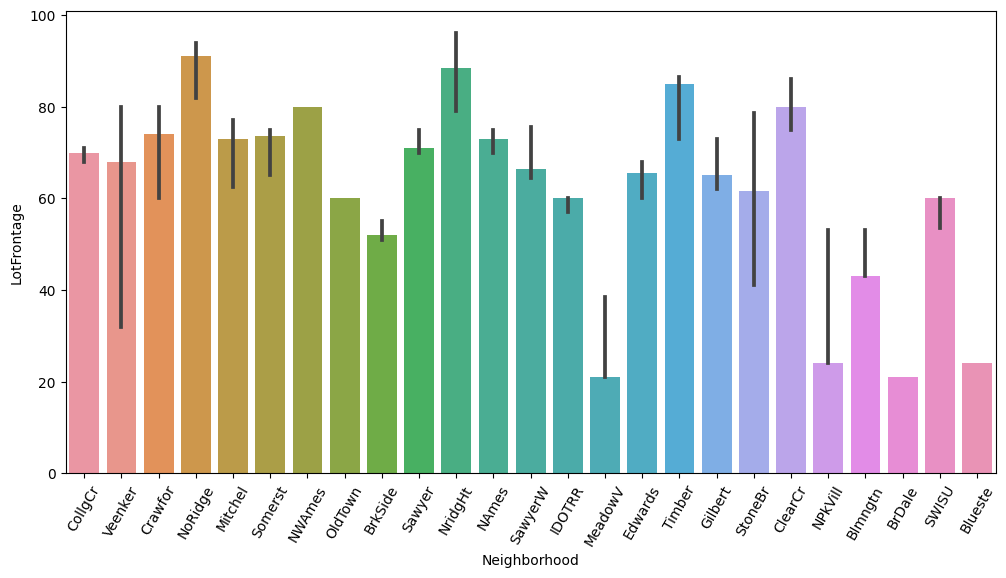

In [532]:
# Looking at the average value per Neighbourhood
fig, ax = plt.subplots(figsize=(12,6))
ax.tick_params(axis='x', labelrotation=60);
sns.barplot(df_train, x='Neighborhood', y='LotFrontage', estimator=np.nanmedian, ax=ax);

In [533]:
# Calculating the median 'LotFrontage' per 'Neighborhood' in df_train
median_lotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].median()

# Imputing missing 'LotFrontage' in df using median 'LotFrontage' per 'Neighborhood' from df_train
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(median_lotFrontage[x.name]) if x.name in median_lotFrontage else x)

### Utilities
Categorical. 2 missing.

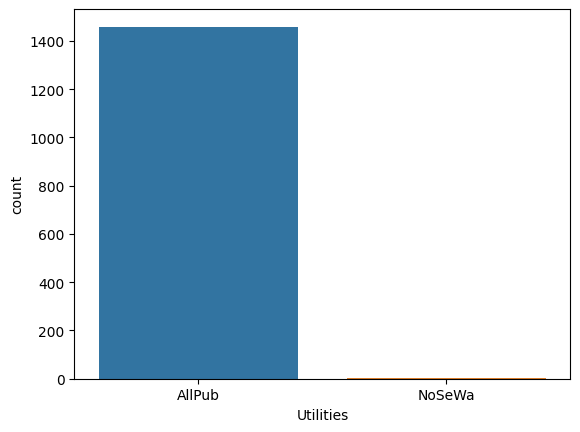

In [534]:
# Visualising the distribution of values 
sns.countplot(df_train, x='Utilities');

In [535]:
# Imputing the mode
df['Utilities'].fillna('AllPub', inplace=True)

### Exterior1st
Categorical. 1 missing.

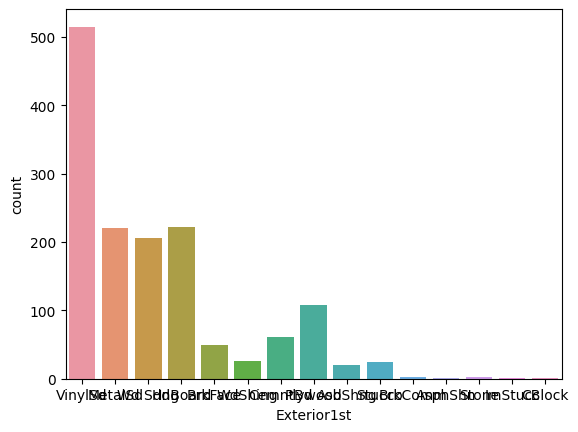

In [536]:
# Visualising the distribution
sns.countplot(df_train, x='Exterior1st');

In [537]:
# Imputing the mode
df['Exterior1st'].fillna('VinylSd', inplace=True)

### Exterior2nd
Categorical. 1 missing.

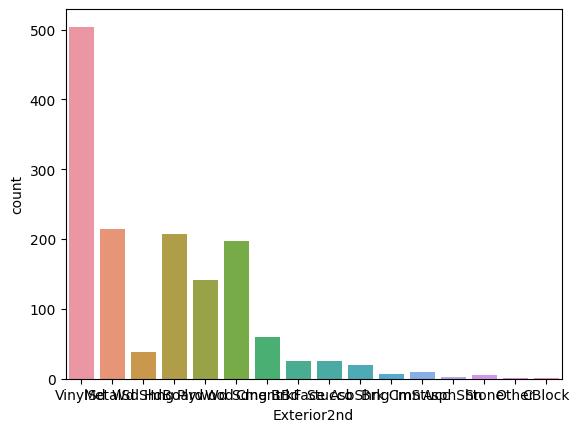

In [538]:
# Visualising the distribution
sns.countplot(df_train, x='Exterior2nd');

In [539]:
# Imputing the mode
df['Exterior2nd'].fillna('VinylSd', inplace=True)

### Masonry Vaneer Features
* MasVnrType. Categorical. 24 missing.
* MasVnrArea. Numerical. 23 missing.

If a property has no masonry vaneer it will have a zero area. First we need to determine if properties missing type data are also the ones missing area data

In [540]:
# Checking if missing masonry vaneer type and area records match
len(df[pd.isna(df['MasVnrType']) & pd.isna(df['MasVnrArea'])] )

23

In [541]:
# Finding the masonry vaneer area that is missing a type
df[pd.isna(df['MasVnrType']) & df['MasVnrArea'] > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2610,20,RL,124.0,27697,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NaN,NaN,NaN,0,11,2007,COD,Abnorml,NaN


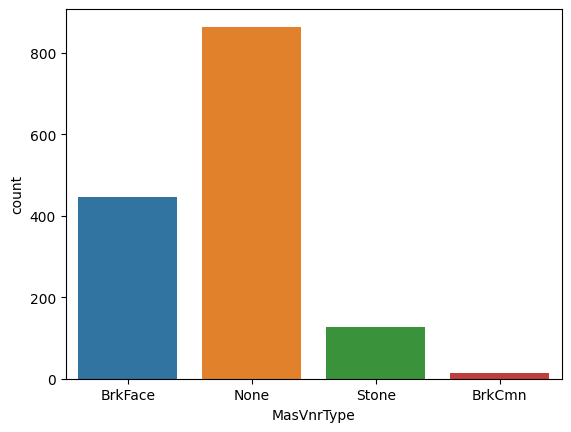

In [542]:
# Looking at the distribution of values
sns.countplot(df_train, x='MasVnrType');

In [543]:
# Imputing the most common vaneer type other than 'None' for the record missing a type
df.loc[1152, 'MasVnrType'] = 'BrkFace'

In [544]:
# Imputing the remaining MasVnrType that are also missing MasVnrArea to 'None'
df.loc[pd.isna(df['MasVnrType']), 'MasVnrType'] = 'None'

In [545]:
# Imputing MasVnrArea with 0 as they all have no MasVnrType
df['MasVnrArea'].fillna(0, inplace=True)

### Basement Variables
* BsmtQual. Categorical. 81 missing.
* BsmtCond. Categorical. 82 missing.
* BsmtExposure. Categorical. 82 missing.
* BsmtFinType1. Categorical. 79 missing
* BsmtFinSF1. Numerical. 1 missing.
* BsmtFinType2. Categorical. 80 missing.
* BsmtFinSF2. Numerical. 1 missing.
* BsmtUnfSF. Numerical. 1 missing.
* TotalBsmtSF. Numerical. 1 missing.
* BsmtFullBath. Numerical. 2 missing.
* BsmtHalfBath. Numerical. 2 missing.

We can see that the categorical basement features are missing between 79-82 values. Lets begin by checking if the 79 records missing values for BsmtFinType1 correspond to the records missing values for the other categorical features.


In [546]:
len(df[pd.isna(df['BsmtQual']) & pd.isna(df['BsmtCond']) & pd.isna(df['BsmtExposure']) &
   pd.isna(df['BsmtFinType1']) & pd.isna(df['BsmtFinType2'])])

79

In [547]:
# Finding the remaining records
df[~pd.isna(df['BsmtFinType1']) & (pd.isna(df['BsmtCond']) | pd.isna(df['BsmtExposure']) |
   pd.isna(df['BsmtQual']) | pd.isna(df['BsmtFinType2']))].loc[:, ['BsmtFinType1', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2']]


,BsmtFinType1,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2
332,GLQ,TA,No,Gd,NaN
948,Unf,TA,NaN,Gd,Unf
1487,Unf,TA,NaN,Gd,Unf
2040,GLQ,NaN,Mn,Gd,Rec
2185,BLQ,NaN,No,TA,Unf
2217,Unf,Fa,No,NaN,Unf
2218,Unf,TA,No,NaN,Unf
2348,Unf,TA,NaN,Gd,Unf
2524,ALQ,NaN,Av,TA,Unf


So we see that there are 9 records where according to BsmtFinType1 there are basements but they have other basement features that suggest they do not. We will asssume that they do in fact have basements and impute the mode of each basement feature.

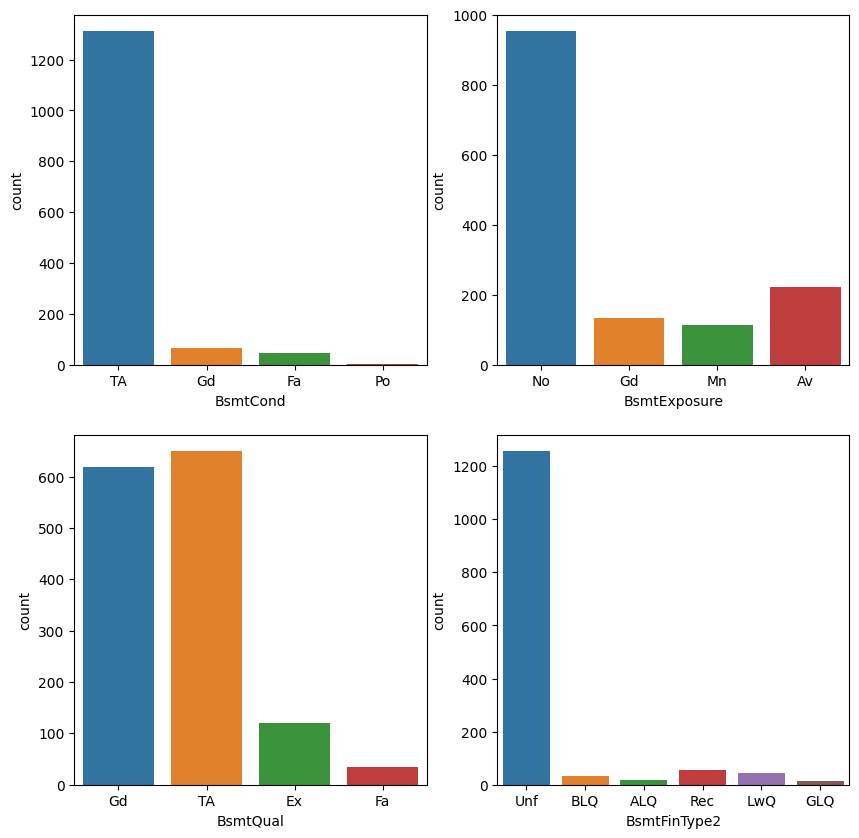

In [548]:
bsmt_feats = ['BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2']
fig, axes = plt.subplots(2,2, figsize=(10,10))
for i, ax in enumerate(fig.axes):
    sns.countplot(df_train, x=bsmt_feats[i], ax=ax)

In [549]:
# Imputing the modes for the missing data in the above
df.loc[df.loc[~pd.isna(df['BsmtFinType1']) & pd.isna(df['BsmtCond'])].index, 'BsmtCond'] = df_train['BsmtCond'].mode()[0]
df.loc[df.loc[~pd.isna(df['BsmtFinType1']) & pd.isna(df['BsmtExposure'])].index, 'BsmtExposure'] = df_train['BsmtExposure'].mode()[0]
df.loc[df.loc[~pd.isna(df['BsmtFinType1']) & pd.isna(df['BsmtQual'])].index, 'BsmtQual'] = df_train['BsmtQual'].mode()[0]
df.loc[df.loc[~pd.isna(df['BsmtFinType1']) & pd.isna(df['BsmtFinType2'])].index, 'BsmtFinType2'] = df_train['BsmtFinType2'].mode()[0]

All of the remaining NaN values for the categorical basement variables need to be converted to 'NA' for no basement and these will be handled later. Lets now look at the numerical basement SF features that are missing data.

In [550]:
# Checking if it is the same record that is missing numerical basement data
df[pd.isna(df['BsmtFinSF1']) & pd.isna(df['BsmtFinSF2']) & pd.isna(df['BsmtUnfSF']) & pd.isna(df['TotalBsmtSF'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


We can see that it is just the one record that contains all the missing basement numerical values, and that this property also does not have a basement, so we can impute these numerical values with 0.

In [551]:
# Setting the numerical vaues to zero
df.loc[2120, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = 0.0

Now we will look at the Basement bath related numerical features that are missing data. Lets check if they are the same records and if the records missing this data actually have basements.

In [552]:
# Checking if records missing basement bath data are the same
df.loc[pd.isna(df['BsmtFullBath']) & pd.isna(df['BsmtHalfBath'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN
2188,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN


We can see that it is just two records missing the basement bath data and that both of these properties do not have a bath, so we will impute with 0.

In [553]:
# Imputing missing values with 0
df.loc[pd.isna(df['BsmtFullBath']) & pd.isna(df['BsmtHalfBath']), ['BsmtFullBath', 'BsmtHalfBath']] = 0

### Electrical
Categorical. 1 missing.

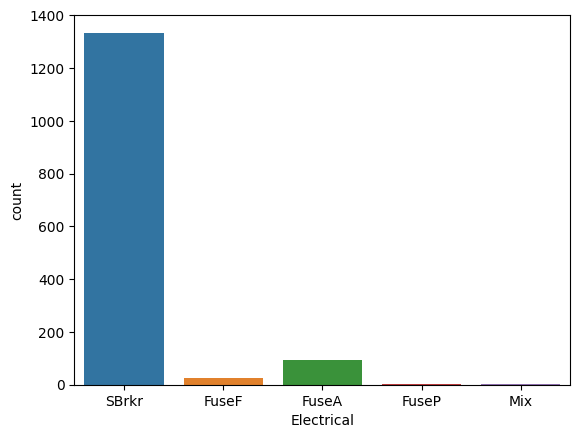

In [554]:
# Looking at the distribution of values
sns.countplot(df_train, x='Electrical');

In [555]:
# Imputing the missing value with 'SBrkr'
df['Electrical'].fillna('SBrkr', inplace=True)

### Kitchen Qual
Categorical. 1 missing.

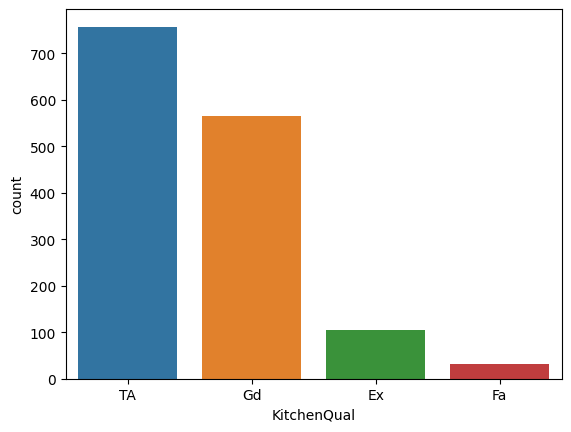

In [556]:
# Visualising distribution of values
sns.countplot(df_test, x='KitchenQual');

In [557]:
# Imputing with the mode
df['KitchenQual'].fillna('TA', inplace=True)

### Functional
Categorical. 2 missing.

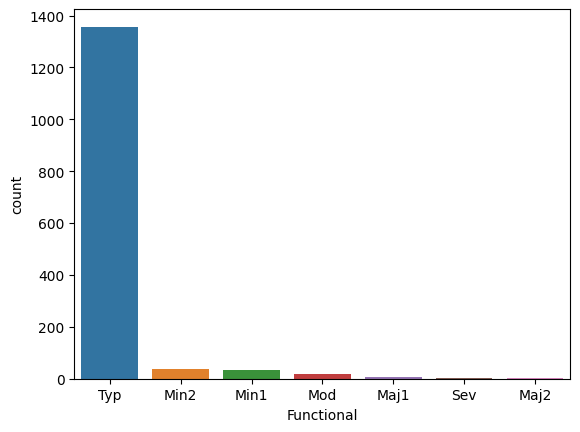

In [558]:
# Visualising distribution of values
sns.countplot(df_test, x='Functional');

In [559]:
# Imputing with the mode
df['Functional'].fillna('Typ', inplace=True)

### FireplaceQu
Categorical. 1420 missing.

Lets identify if the records missing FireplaceQu also do not have any fireplaces.

In [560]:
len(df[(df['Fireplaces']==0) & (pd.isna(df['FireplaceQu']))])

1420

Since all the records missing FireplaceQu data also do not have any fireplaces, the FireplaceQu needs to be converted to 'NA'. This will be handled later.

### Garage Variables
* GarageType. Categorical. 157 missing.
* GarageYrBuilt. Numerical. 159 missing.
* GarageFinish. Categorical. 159 missing
* GarageCars. Numerical. 1 missing
* GarageArea. Numerical. 1 missing
* GarageQual. Categorical. 159 missing.
* GarageCond. Categorical. 159 missing.

Lets first see if the 157 records missing GarageType are  missing the other Garage variables with 159 missing entries.

In [561]:
len(df[df['GarageType'].isna() & df['GarageYrBlt'].isna() & df['GarageFinish'].isna()
       & df['GarageQual'].isna() & df['GarageCond'].isna()])

157

So we now that there are 157 records that do not have a garage. We will hander these later. For now lets find the two records that have a GarageType but not other Garage data.

In [562]:
df[~df['GarageType'].isna() & df['GarageYrBlt'].isna() & df['GarageFinish'].isna()
       & df['GarageQual'].isna() & df['GarageCond'].isna()].loc[:, ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
2126,Detchd,NaN,NaN,NaN,NaN
2576,Detchd,NaN,NaN,NaN,NaN


Lets begin by imputing all missing GarageYrBuilt data with the YearBuilt data for the house. We will then impute the missing categorical data in the two records above with the modes of the values in df_train.

In [563]:
# Setting the year the garages were built to the year the house was built
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isna(), 'YearBuilt']

In [564]:
# Imputing the modes of the remaining categorical Garage variables into the two missing records above
df.loc[~df['GarageType'].isnull() & df['GarageFinish'].isnull(), 'GarageFinish'] = df_train['GarageFinish'].mode()[0]
df.loc[~df['GarageType'].isnull() & df['GarageQual'].isnull(), 'GarageQual'] = df_train['GarageQual'].mode()[0]
df.loc[~df['GarageType'].isnull() & df['GarageCond'].isnull(), 'GarageCond'] = df_train['GarageCond'].mode()[0]

The remaining 157 records missing the categorical Garage data need their NaN values converted to 'NA'. These will be handled later. Next we will investigate the record/s missing GarageCars and GarageArea.

In [565]:
len(df[df['GarageCars'].isna() & df['GarageArea'].isna()])

1

In [566]:
# Visualising the record
df[df['GarageCars'].isna() & df['GarageArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2576,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,1923.0,Unf,NaN,NaN,TA,TA,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


For this record we will impute with the mode for GarageCars (as it is discrete) and the median GarageArea value, from df_train.

In [567]:
# Imputing missing values
df.loc[2576, 'GarageCars'] = df_train['GarageCars'].mode()[0]
df.loc[2576, 'GarageArea'] = df_train['GarageArea'].median()

### PoolQC
Categorical. 2909 missing.

In [568]:
# Checking that the missing PoolQC values are because there is no pool
len(df[(df['PoolQC'].isna()) & (df['PoolArea']==0)])

2906

This means that there are 3 records that have NaN as their PoolQC but a PoolArea greater than 0. Lets identify these records.

In [569]:
df[(df['PoolQC'].isna()) & (df['PoolArea'] != 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2420,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953.0,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal,NaN
2503,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal,NaN
2599,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,NaN,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal,NaN


<AxesSubplot: xlabel='PoolQC', ylabel='count'>

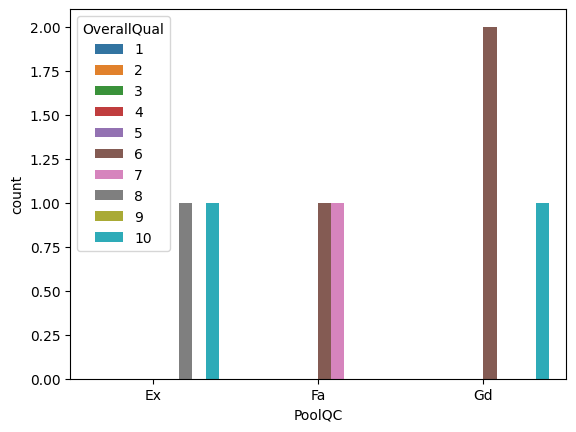

In [570]:
sns.countplot(df_train, x='PoolQC', hue='OverallQual')

Given the above I am going to impute the record missing PoolQC but with an OverallCond of 6 with 'Fa'. I will then impute the remaining two records with 'Po'. This will be a new value and will allow the PoolQC feature to follow the same ordinality as many of the other quality related features. The remaining NaN values are because the property does not have a pool and these will be dealt with later.

In [571]:
# Imputing missing values as explained above
df.loc[(df['PoolQC'].isna()) & (df['PoolArea'] != 0) & (df['OverallQual'] >= 6), 'PoolQC'] = 'Po'
df.loc[(df['PoolQC'].isna()) & (df['PoolArea'] != 0) & (df['OverallQual'] < 6), 'PoolQC'] = 'Po'

### SaleType
Categorical. 1 missing.

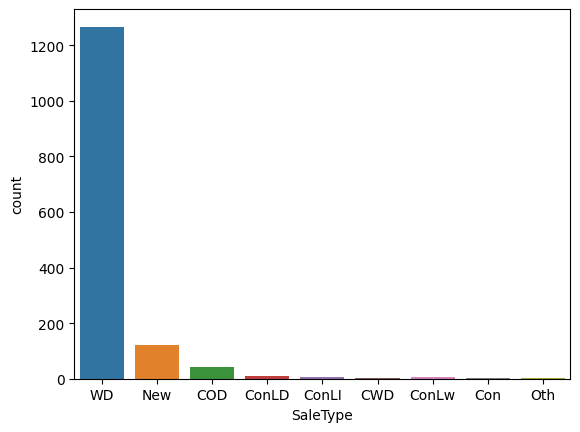

In [572]:
sns.countplot(df_train, x='SaleType');

In [573]:
df['SaleType'].fillna('WD', inplace=True)

### Remaining Features
Through investigation of the remaining features that are missing data it is possible to see that they all contain nan values when these should actually be 'NA'. Thus for each of these features we will impute nan with 'NA'.

In [574]:
nan_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
            'Fence', 'MiscFeature']
for col in nan_cols: df[col].fillna('NA', inplace=True)

In [575]:
# Confirming all missing data has been handled
missing_data = df.isna().sum()
missing_data[missing_data>0]

SalePrice    1459
dtype: int64

Now we have dealt with the missing data, we can begin to investigate numerical and categorical features in more detail.

## Numerical Features
In this section we will investigate the numerical features. We will be specifically looking at their distributions and whether they contain any outliers. We will not perform any encoding until feature engineering has been conducted.

In [576]:
# Selecting only the numeric features from the dataset
df_num = df.select_dtypes(include= ['float64', 'int64'])
print(df_num.shape)
df_num.head()

(2919, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [577]:
# The features 'MSSubClass', 'MoSold' and 'YrSold' are all categorical features instead of numeric so we will convert these to the appropriate type
cat_cols = ['MSSubClass', 'MoSold', 'YrSold']
df[cat_cols] = df[cat_cols].astype('O')

In [578]:
# Obtaining numerical features from original dataframe once again
df_num = df.select_dtypes(include= ['float64', 'int64'])
print(df_num.shape)
df_num.head()

(2919, 34)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,208500.0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,181500.0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,223500.0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,140000.0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,250000.0


In [579]:
# Looking at numerical feature summary statistics
df_num.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,69.562350,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1976.253854,1.766701,472.877013,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,180921.195890
std,21.703819,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,27.040351,0.761506,215.357944,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,755000.000000


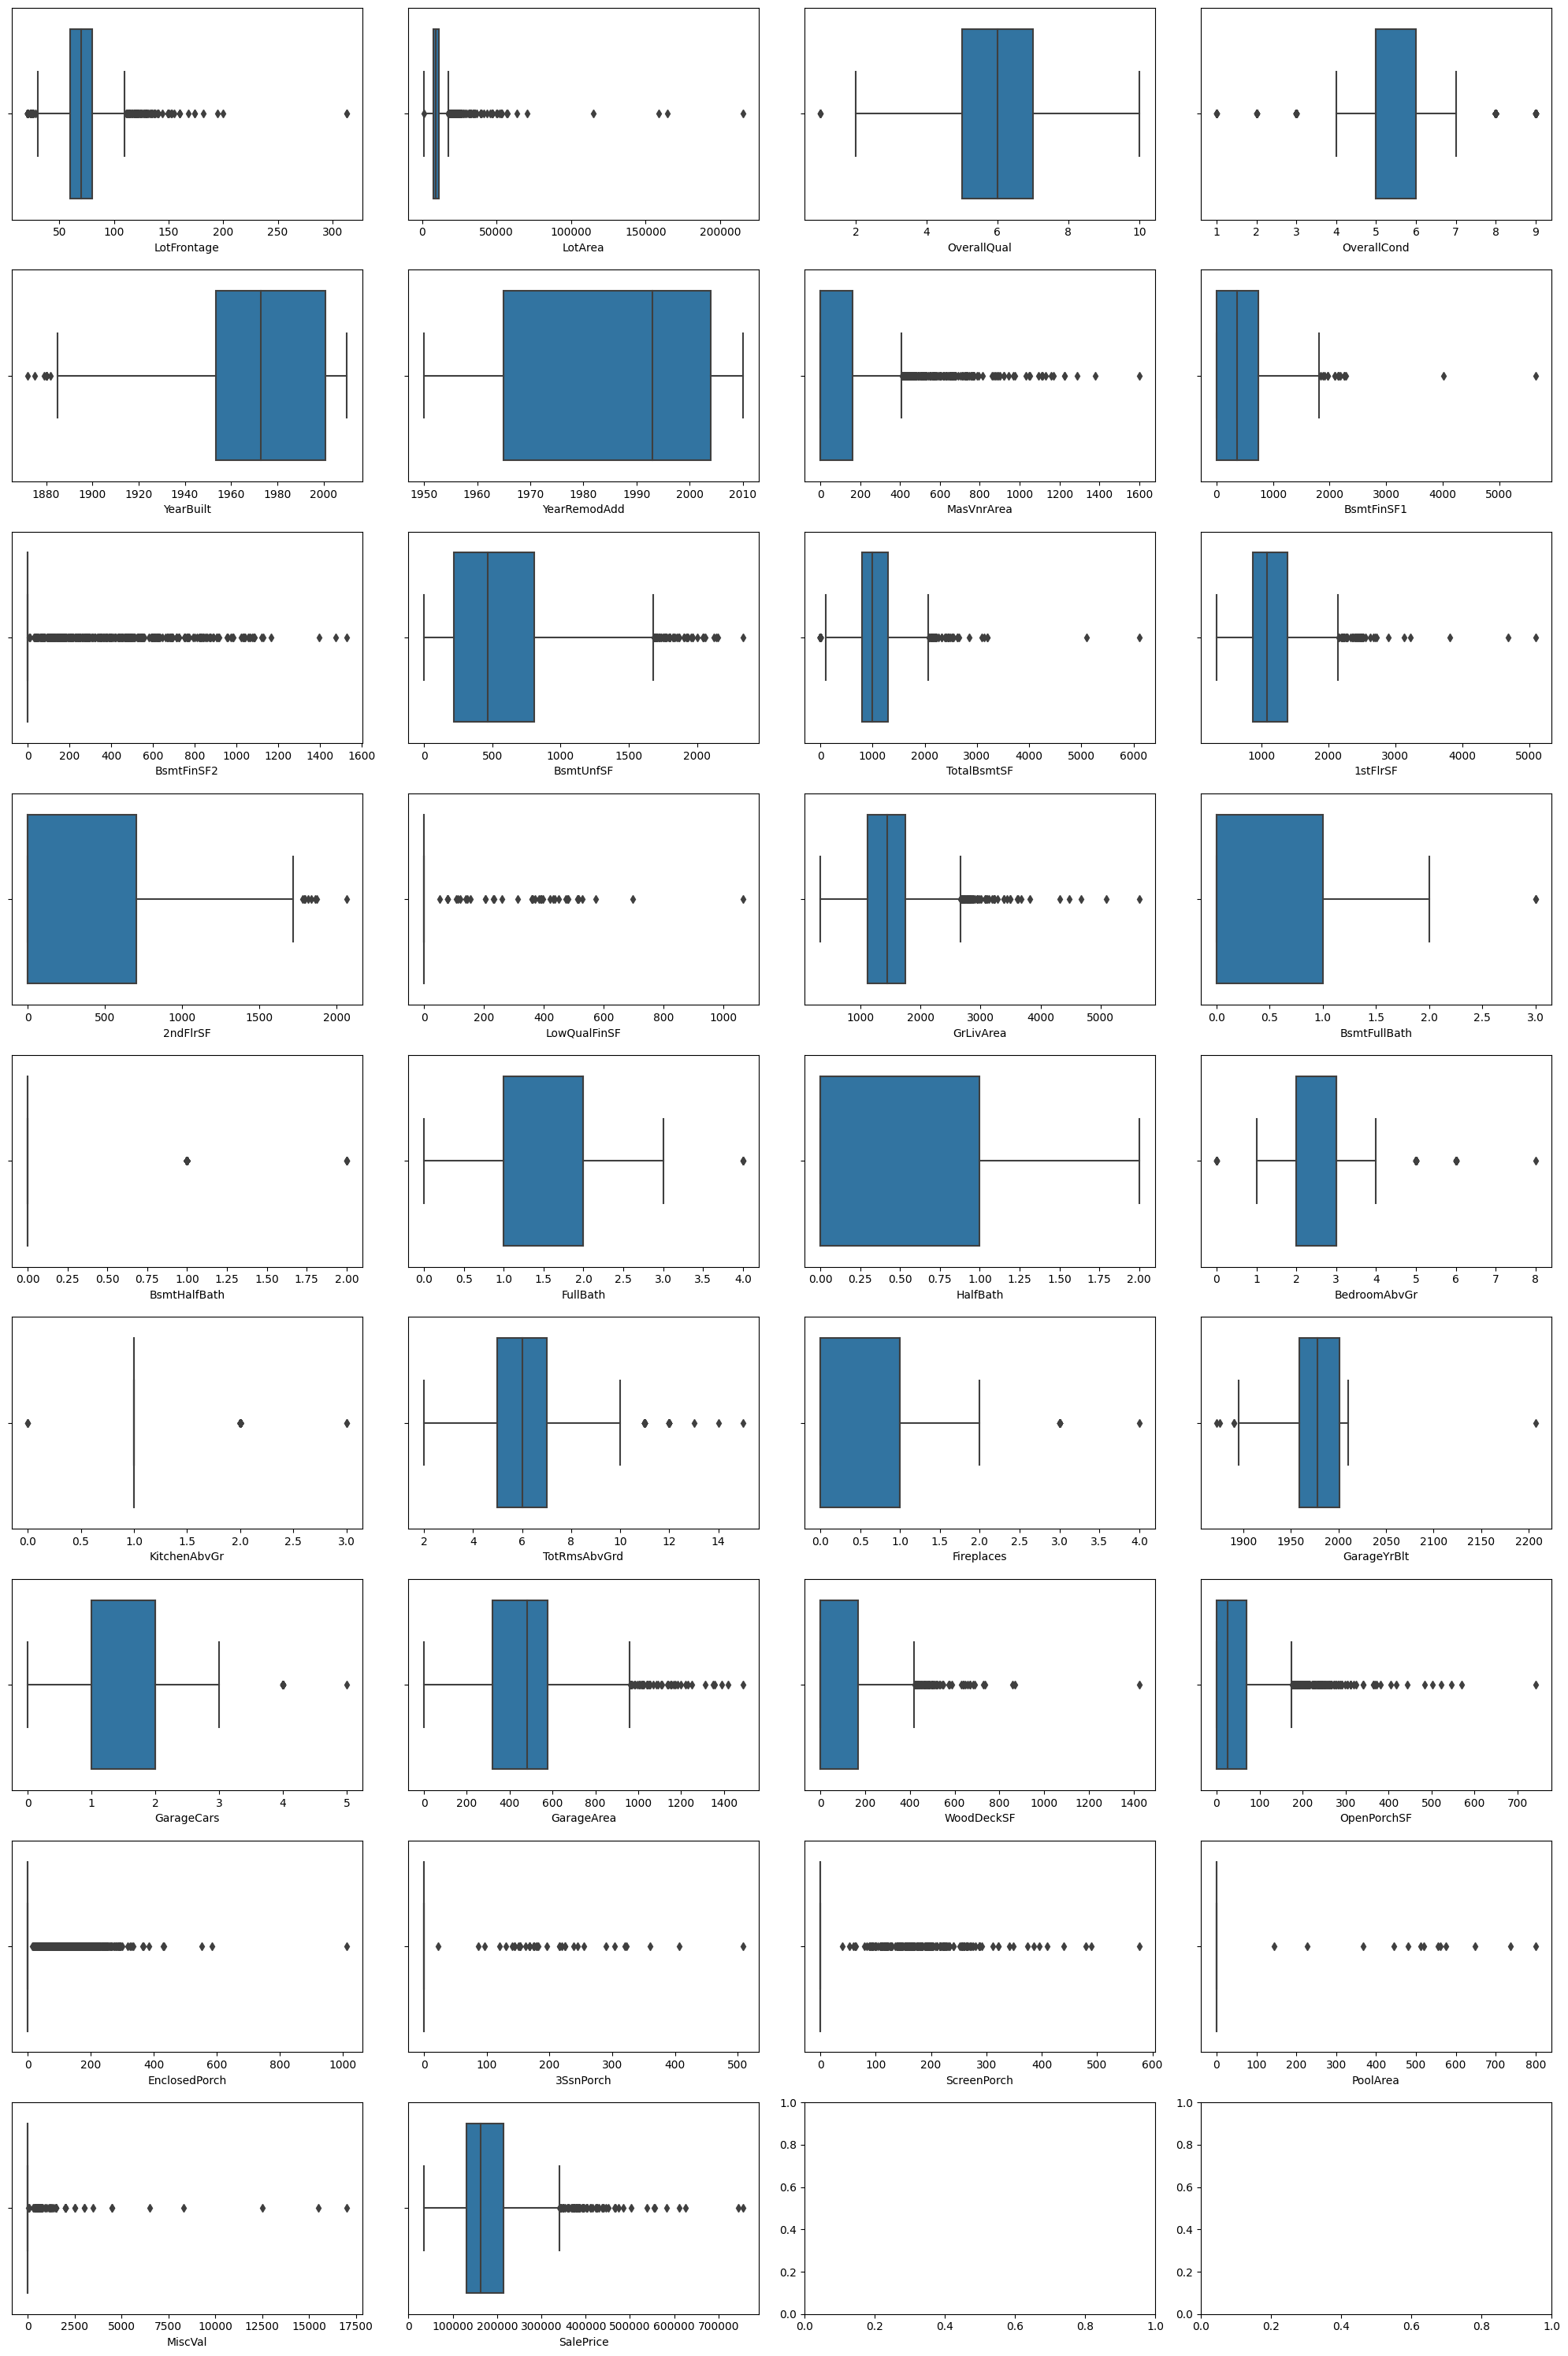

In [580]:
# Plotting the distributions of the numerical features
from math import ceil
fig, axes = plt.subplots(ceil(len(df_num.columns)/4), 4, figsize=(20,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_num.columns):
        #ax.tick_params(axis='x', labelrotation=60)
        sns.boxplot(data=df_num, x=df_num.columns[i], ax=ax)

fig.tight_layout()

The main takeaway from the boxplots above is that there does seem to be outliers in some of the continuous numerical features. Right now I think the main concern is the outliers in the 'LotArea' feature. I would assume that larger lot areas would typiclly have a greater price so lets just confirm that this is the case. There is also an outlier in the GarageYrBlt feature that appears to be a data error and will have to be dealt with.

In [581]:
# Investigating records with large LotAreas
df_num[df['LotArea']>100000]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
249,80.0,159000,6,7,1958,2006,472.0,697.0,0.0,747.0,1444.0,1444,700,0,2144,0.0,1.0,2,0,4,1,7,2,1958.0,2.0,389.0,0,98,0,0,0,0,500,277000.0
313,150.0,215245,7,5,1965,1965,0.0,1236.0,820.0,80.0,2136.0,2036,0,0,2036,2.0,0.0,2,0,3,1,8,2,1965.0,2.0,513.0,0,0,0,0,0,0,0,375000.0
335,85.0,164660,5,6,1965,1965,0.0,1249.0,147.0,103.0,1499.0,1619,167,0,1786,2.0,0.0,2,0,3,1,7,2,1965.0,2.0,529.0,670,0,0,0,0,0,700,228950.0
706,80.0,115149,7,5,1971,2002,351.0,1219.0,0.0,424.0,1643.0,1824,0,0,1824,1.0,0.0,2,0,2,1,5,2,1971.0,2.0,739.0,380,48,0,0,0,0,0,302000.0


In [582]:
# Checking whether they have a SalePrice that is larger than the mean
print(df.loc[0:train_len, 'SalePrice'].mean())
df_num.loc[df['LotArea']>100000, 'SalePrice'] > df.loc[0:train_len, 'SalePrice'].mean()

180921.19589041095


249    True
313    True
335    True
706    True
Name: SalePrice, dtype: bool

Given that there are not any questionably low SalePrice values associated with these large LotArea records, I am happy for them to stay in the dataset. Next we will deal with the GarageYrBlt outlier.

In [583]:
# Identifying the record
df.loc[df['GarageYrBlt']>2010, 'GarageYrBlt']

2592    2207.0
Name: GarageYrBlt, dtype: float64

Obviously this is way too high so we will replace it with the year the house was built instead.

In [584]:
# Replacing erroneous value
df.loc[df['GarageYrBlt']>2010, 'GarageYrBlt'] = df.loc[df['GarageYrBlt']>2010, 'YearBuilt']

# Resetting df_num
df_num = df.select_dtypes(include= ['float64', 'int64'])

## Categorical Features
In this section we will focus on investigating the categorical features.


In [585]:
# Obtaining a dataframe of just categorical features
df_cat = df.select_dtypes('O')
print(df_cat.shape)
df_cat.head()

(2919, 46)


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,2,2008,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,5,2007,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,9,2008,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,2,2006,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,12,2008,WD,Normal


Whilst they are categorical, I am going to drop the year related features since they contain so many categories. Note that 'MoSold' and 'YrSold' do not contain so many categories and so we will keep these with the other categorical features for now.

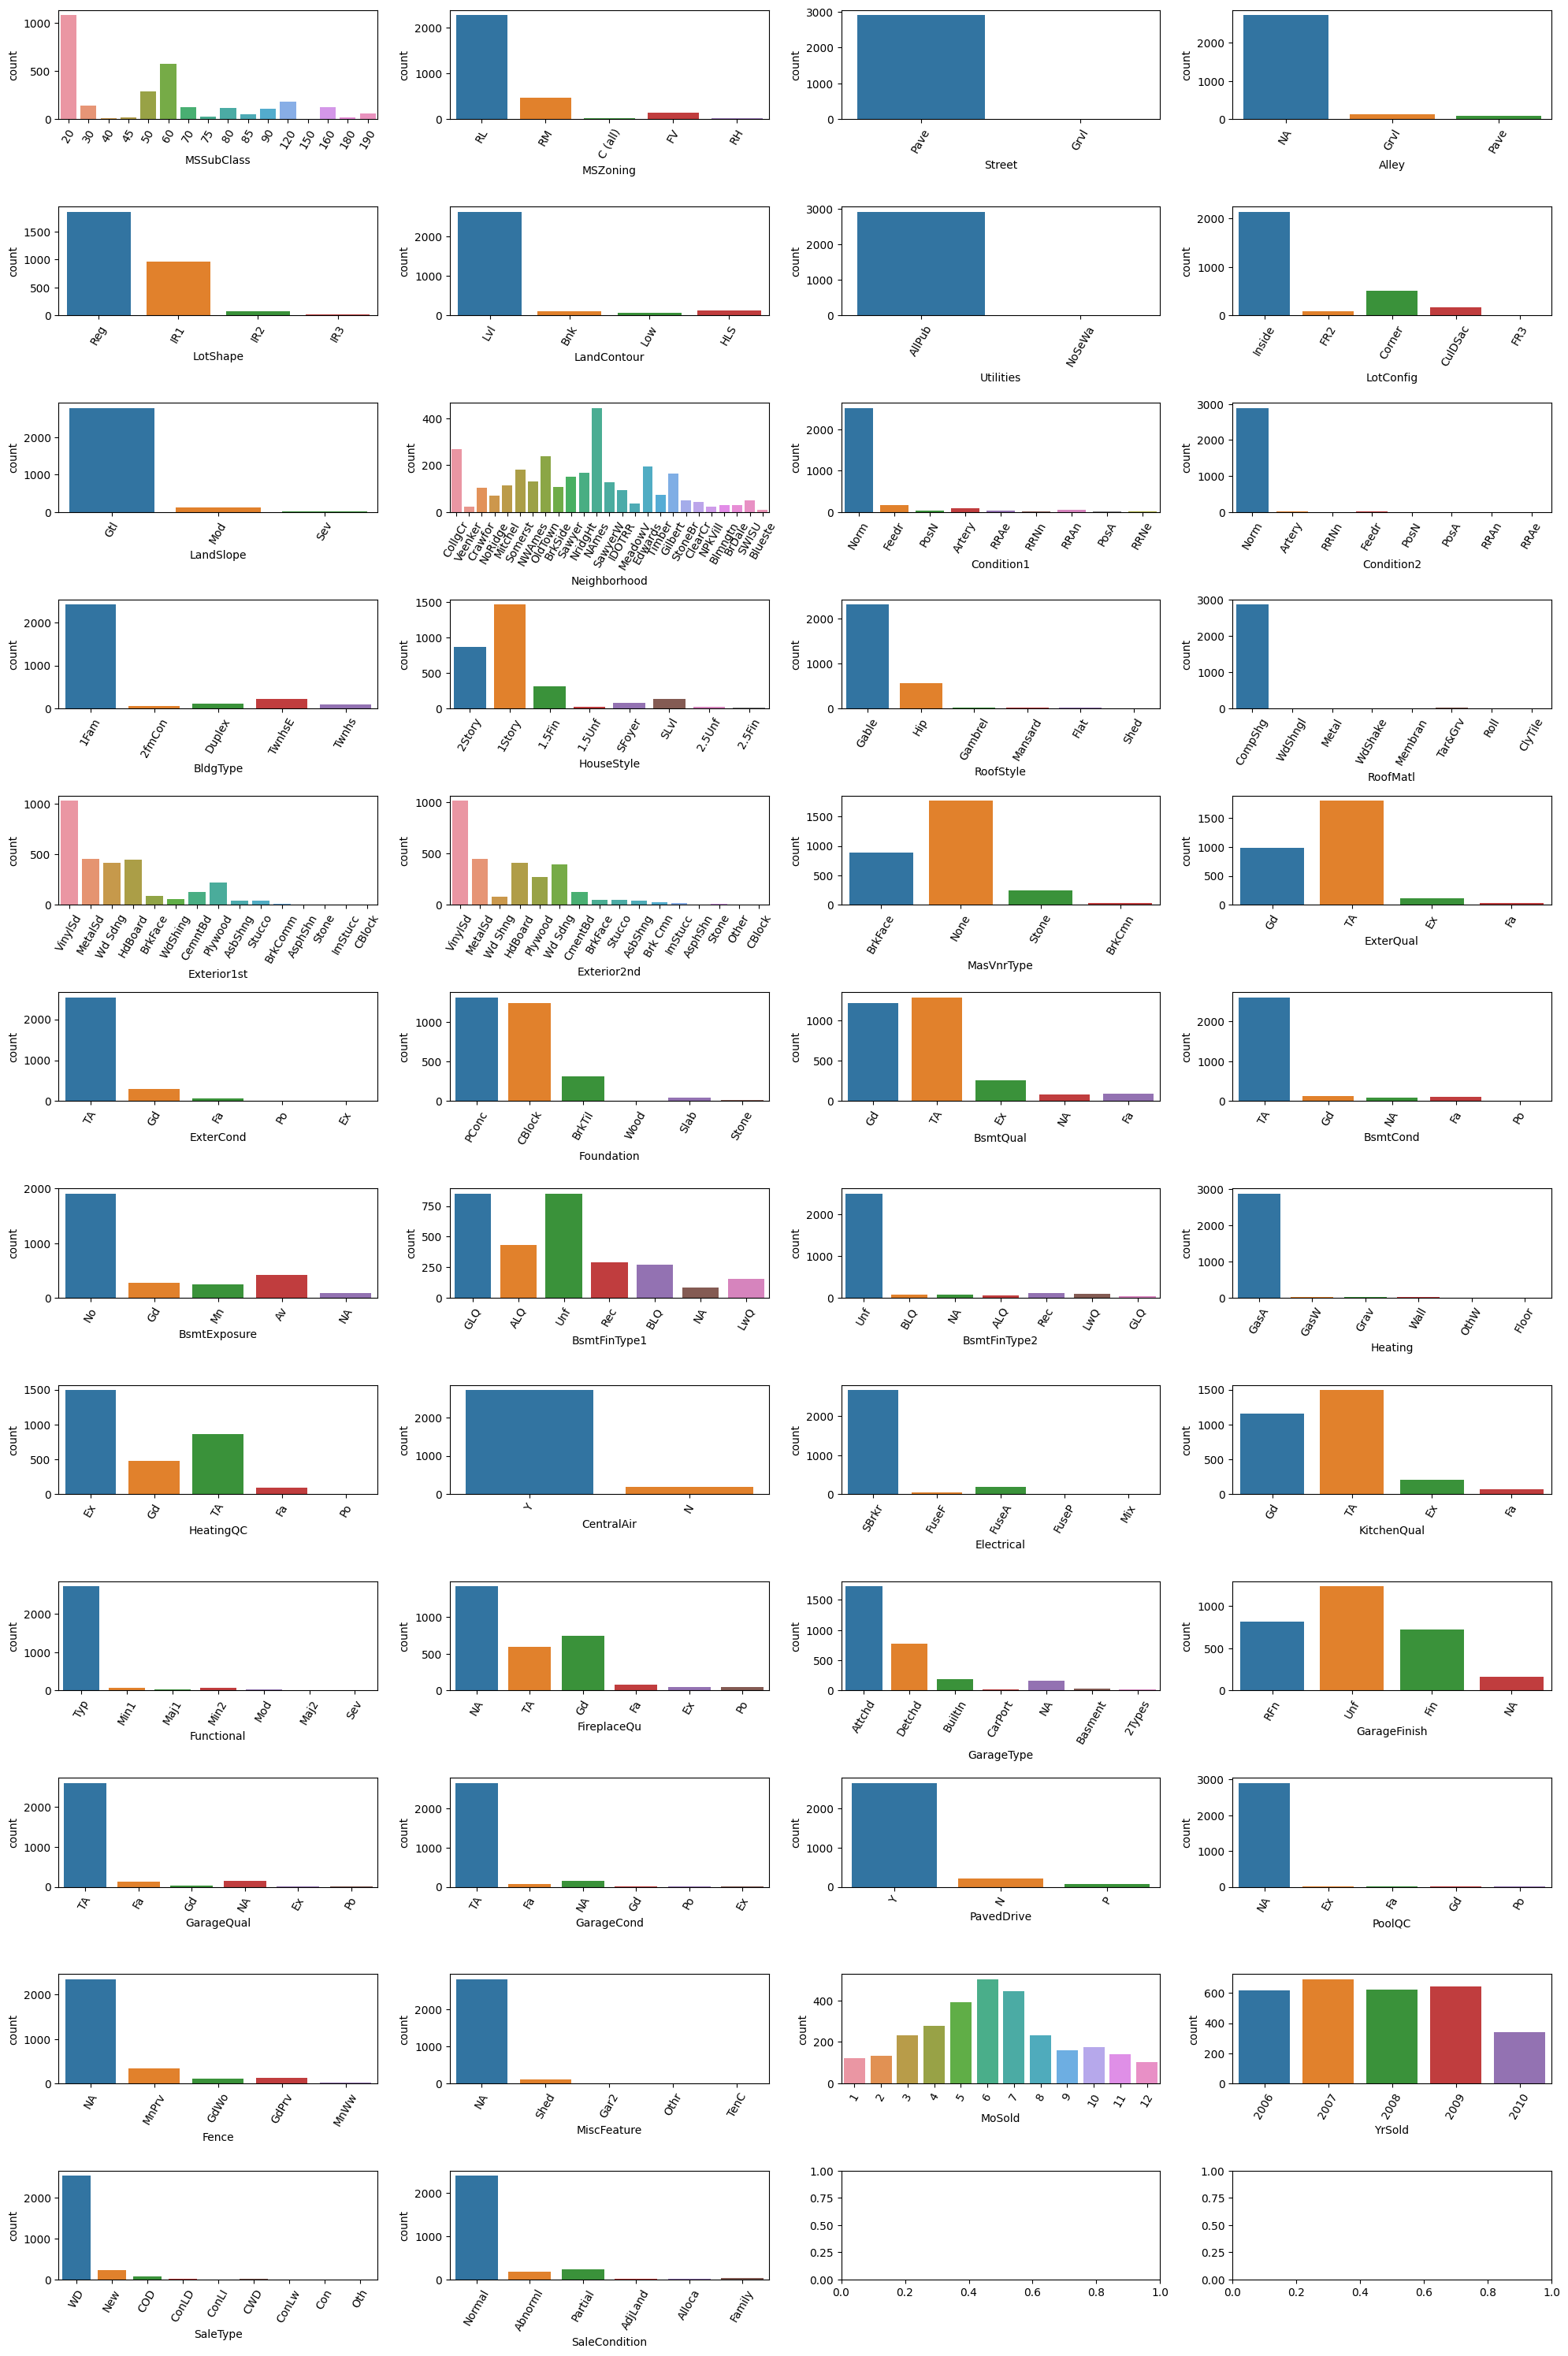

In [586]:
# Creating bar charts to visualise the distribution of each categorical variable
from math import ceil
fig, axes = plt.subplots(ceil(len(df_cat.columns)/4), 4, figsize=(20,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.tick_params(axis='x', labelrotation=60)
        sns.countplot(data=df_cat, x=df_cat.columns[i], ax=ax)

fig.tight_layout()

From the countplots above we notice that there are quite a few low variance categorical features that are likely to be removed during the feaure selection stage. 

It is also worth noting at this point that from the 'YrSold' feature we can see that the dataset spans the financial crisis. It is possible that this had an effect on the house prices and should be investigated in later sections.

# Exploratory Analysis

## Numerical Features

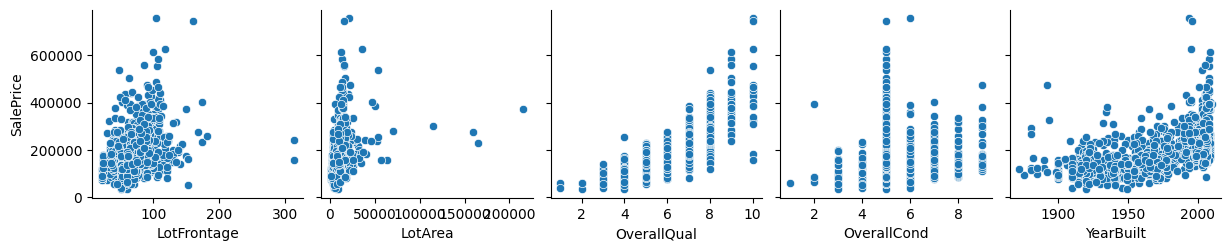

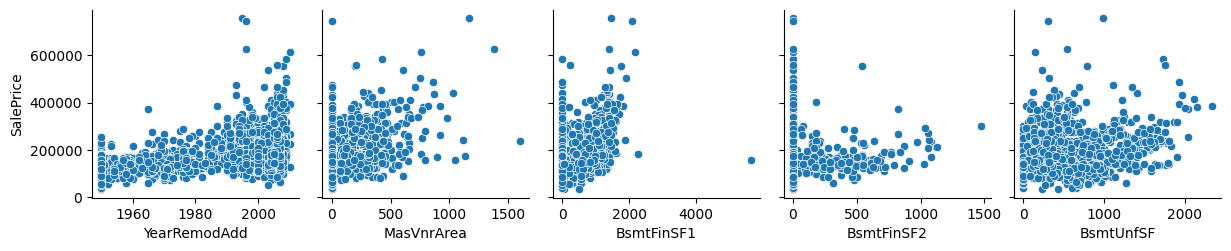

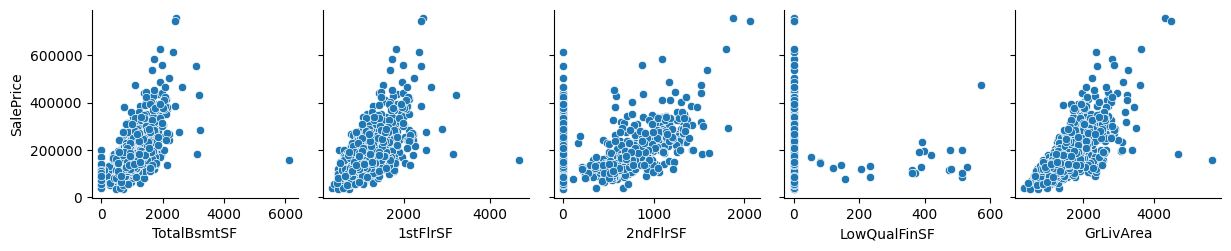

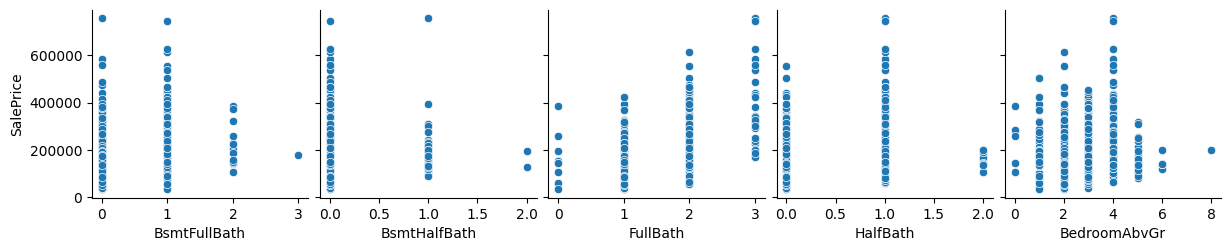

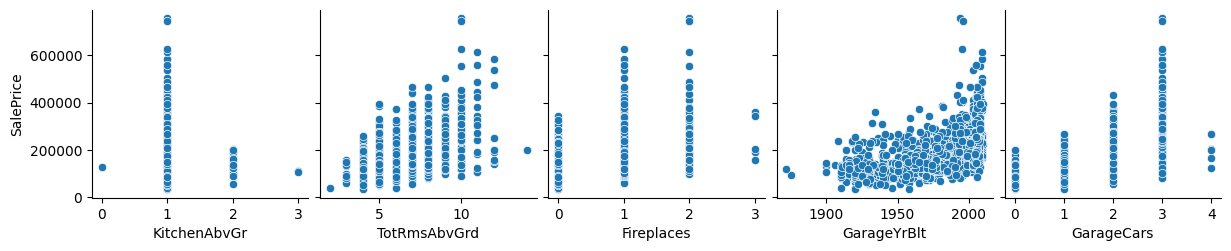

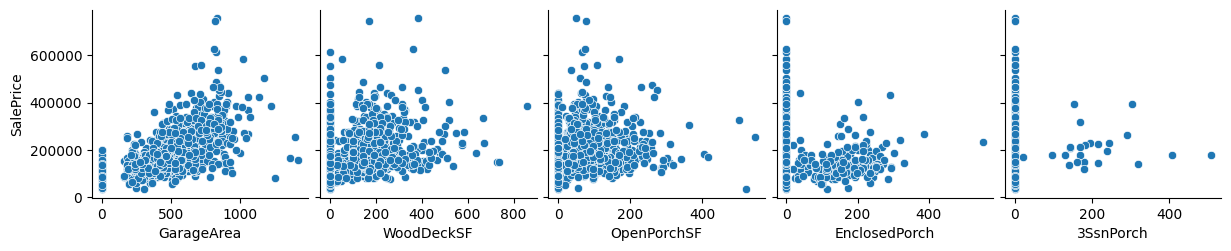

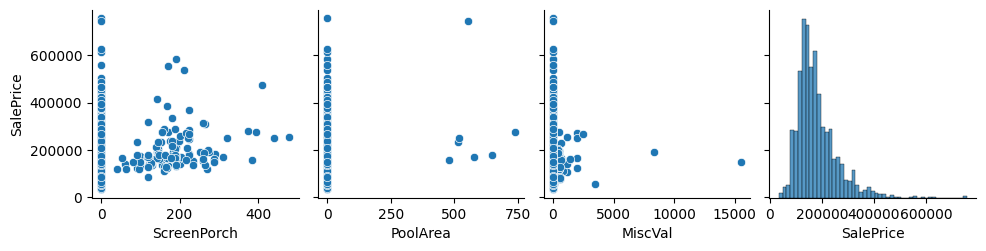

In [587]:
# Plotting the correlation between each numeric feature and the target
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(
        data=df_num, 
        x_vars=df_num.columns[i:i+5], 
        y_vars=['SalePrice'],
        height= 2.5
    )
    

From the scatter plots above we can see that there are some numerical features that definitely appear to have significant correlation with SalePrice, most notably: OverallQual, TotRmsAbvGrd and GarageCars. This can be all be expected as better quality properties, those with more rooms or those with larger garages should be worth more.

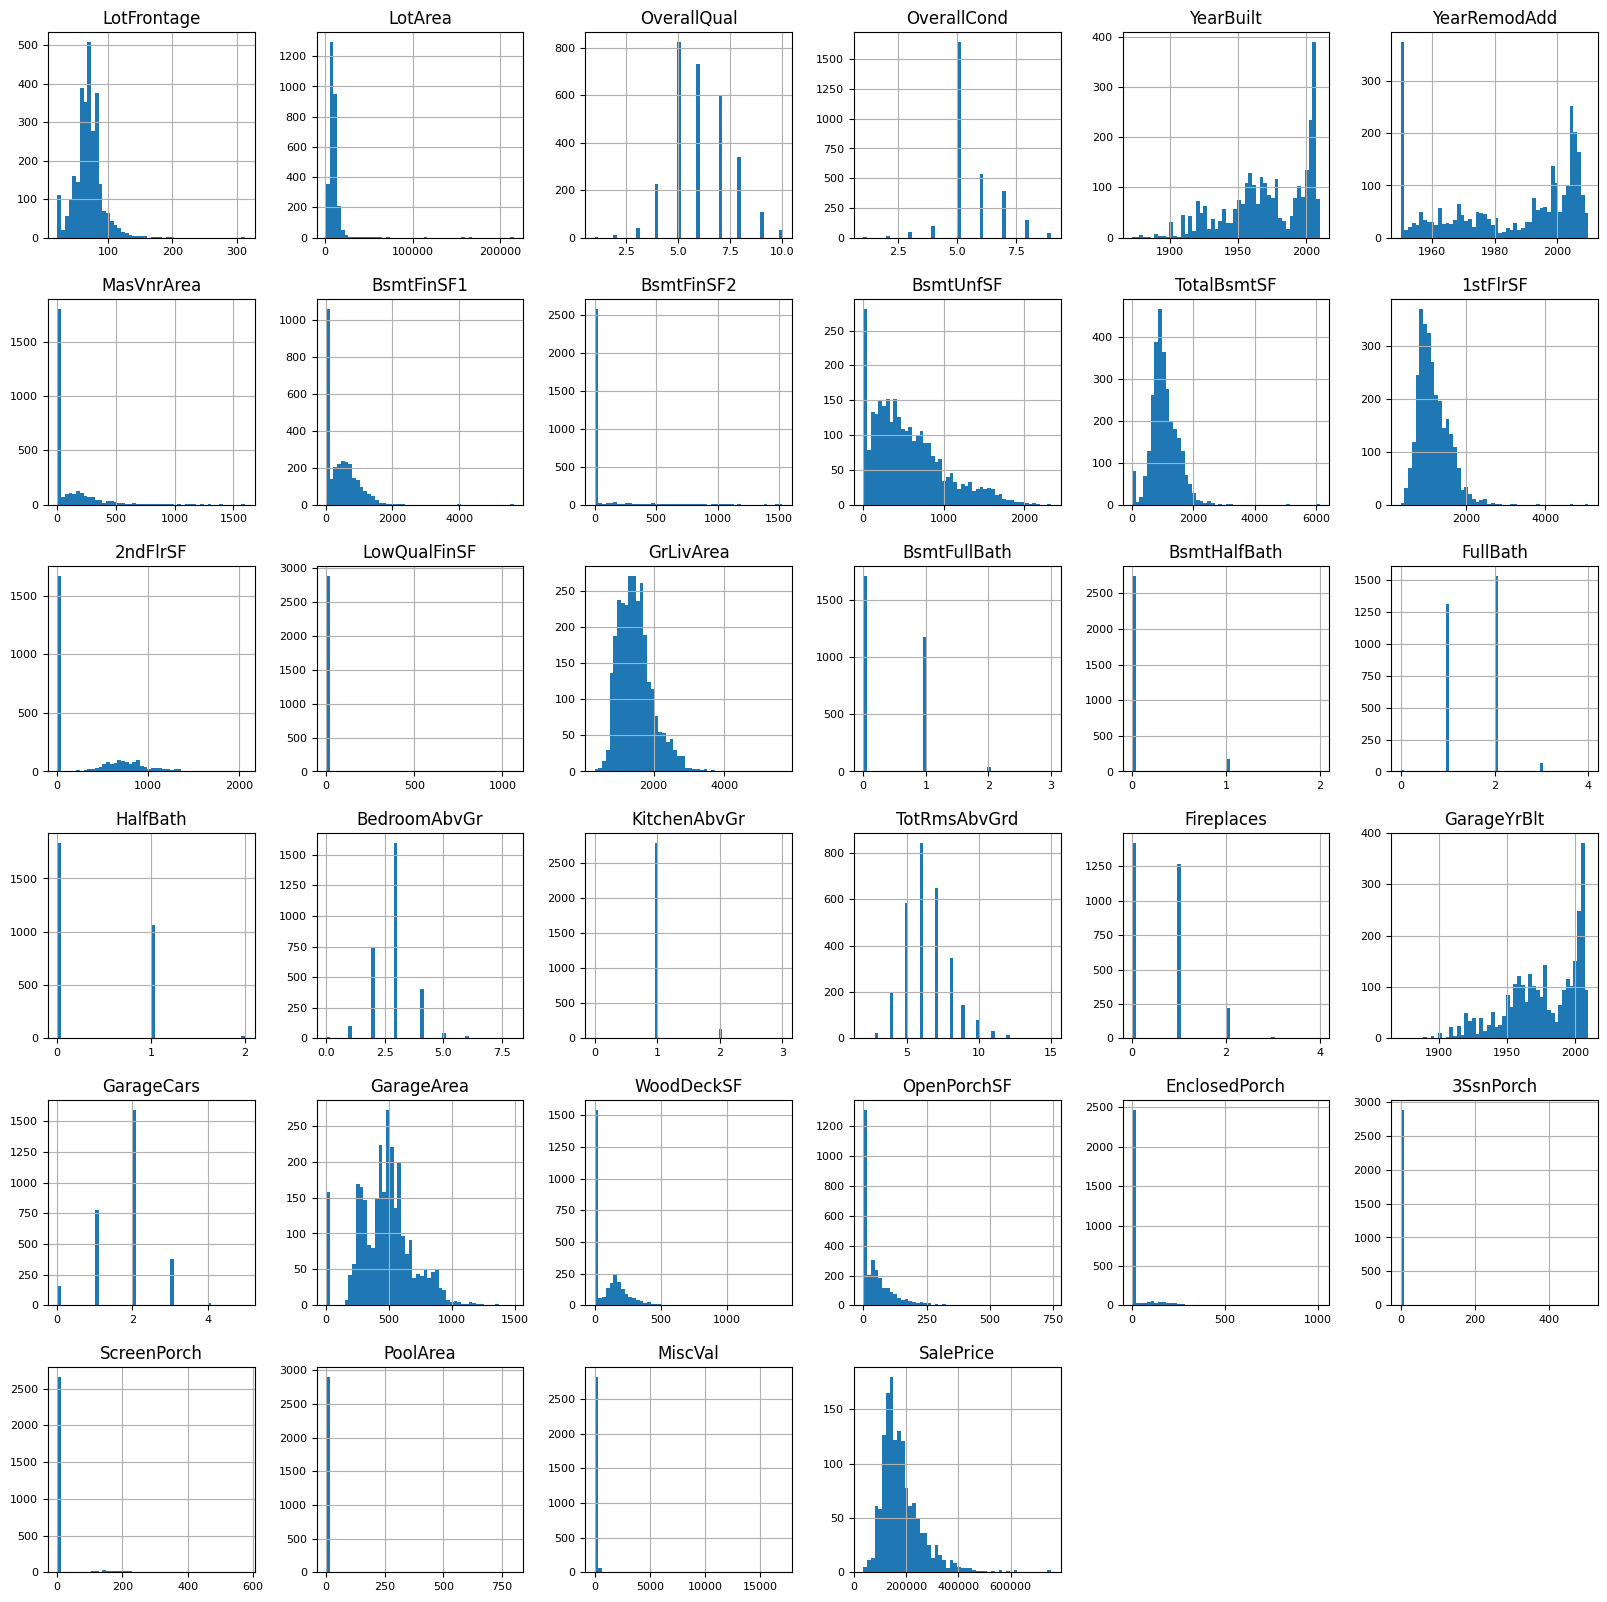

In [588]:
# Plotting the distributions of all the numerical features
df_num.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

We can see from the histrograms that there are some features such as 'TotalBsmtSF' and '1stFlrSF' that follow a similar distribution, meaning that these features are likely to be highly correlated. Furthermore, there are features such as the two aforementioned (including SalePrice) that do not follow a normal distribution and this should be taken into consideration during the feature engineering stage.

## Categorical Features

In [589]:
# Adding target to categorical feature datafram
df_cat = pd.concat([df_cat, df['SalePrice']], axis=1)

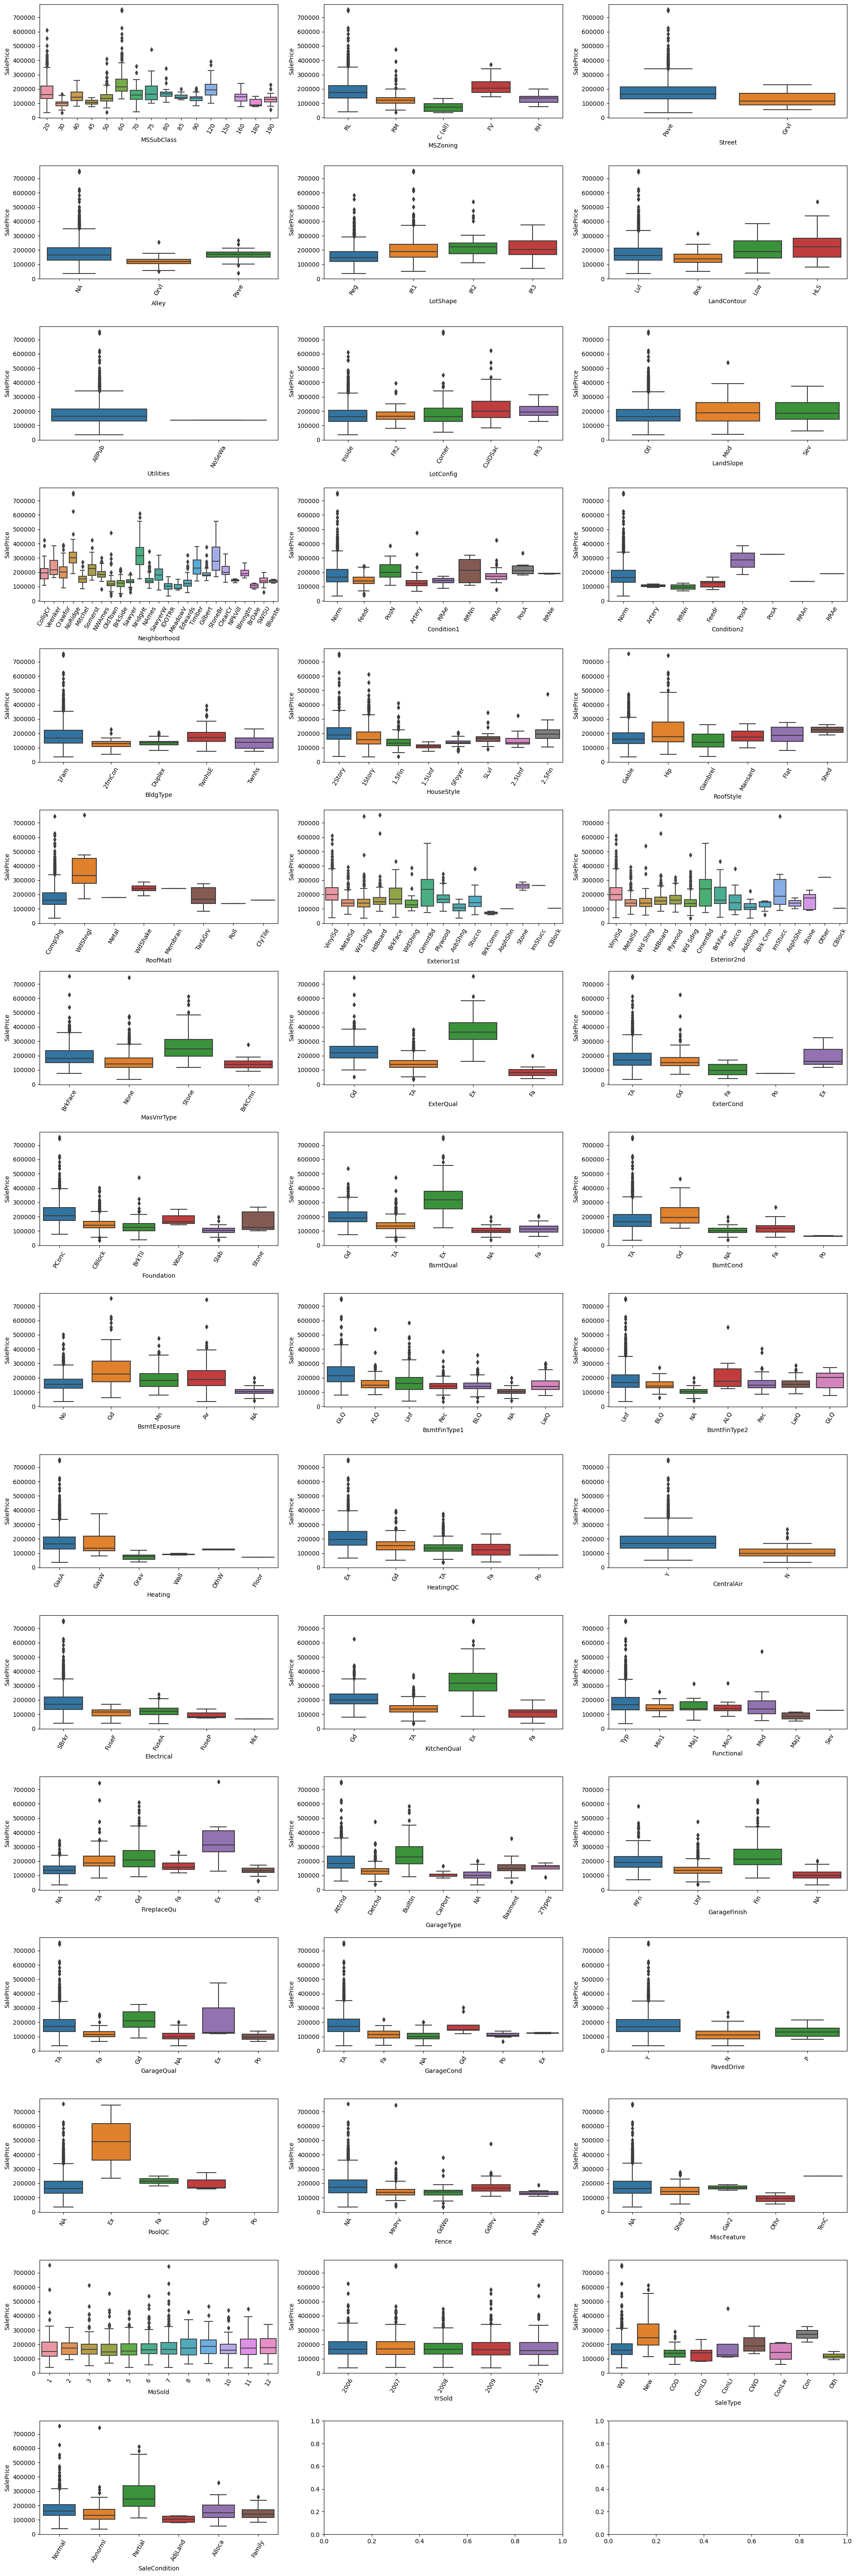

In [590]:
from math import ceil

# Plotting the correlation between each numeric feature and the target
fig, axes = plt.subplots(ceil(len(df_cat.columns)/3), 3, figsize=(20,60))
for i, ax in enumerate(fig.axes):
    if i < (len(df_cat.columns) -1):
        ax.tick_params(axis='x', labelrotation=60)
        sns.boxplot(
            data = df_cat,
            x = df_cat.columns[i],
            y = 'SalePrice',
            ax=ax
        )

plt.tight_layout()

From the boxplots above, some of the main takeaways are:
* SalePrice varies significantly across MSSubClass and Neighbourhood values
* An 'Ex' value for any of the Quality related features typically corresponds with a higher SalePrice
* Having a pool with 'Ex' quality significantly increases sale price
* Some seasonality does seem to be present in the data
* The year the property was sold does not seem to effect the sale price as much as expected given the 2008 financial crash

Lets now save the cleaned train and test sets.

In [597]:
# Splitting the cleaned dataframe back into train and test sets
df_train_clean = df.loc[0:train_len]
df_test_clean = df.loc[train_len+1:].reset_index()

# Saving each dataframe
df_train_clean.to_csv(r'../data/formatted_data/train_clean.csv')
df_test_clean.to_csv(r'../data/formatted_data/test_clean.csv')